In [1]:
from wwo_hist import retrieve_hist_data

In [3]:
frequency = 4
start_date = '30-APRIL-2023'
end_date = '31-MAY-2023'
api_key = 'c0ca0e1bb6ef482fadf154317230905'
location_list = ['amersfoort']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for amersfoort


Currently retrieving data for amersfoort: from 2023-04-30 to 2023-04-30
Time elapsed (hh:mm:ss.ms) 0:00:00.245032
Currently retrieving data for amersfoort: from 2023-05-01 to 2023-05-31


c:\Users\TomK2\anaconda3\envs\darts_test\lib\site-packages\wwo_hist\__init__.py:69: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_mon_begin = pd.date_range(start_date, end_date, freq='MS', closed='right')
c:\Users\TomK2\anaconda3\envs\darts_test\lib\site-packages\wwo_hist\__init__.py:74: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_mon_end = pd.date_range(start_date, end_date, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:02.265893


export amersfoort completed!




In [3]:
import pandas as pd
from darts import TimeSeries, concatenate
df_weath_pred = pd.read_csv('amersfoort.csv')
df_weath_pred = df_weath_pred.rename(columns={'date_time': 'time'})
# inverse humidity data
df_weath_pred['humidity'] = 100 - df_weath_pred['humidity']
# square humiduty data
df_weath_pred['humidity'] = df_weath_pred['humidity']**2

df_weath_pred.index = pd.to_datetime(df_weath_pred['time'])
df_weath_pred = df_weath_pred.interpolate(method='time')
df_weath_pred = df_weath_pred.resample('900S').mean()
# Drop NaN values by interpolating
df_weath_pred = df_weath_pred.interpolate(method='time')
df_weath_pred = df_weath_pred.resample('900S').mean()
# Drop NaN values
df_weath_pred = df_weath_pred.dropna()
df_weath_pred = df_weath_pred.clip(lower=0.1)
ts_weather_df = TimeSeries.from_dataframe(df_weath_pred, freq='900S')

from darts.utils.missing_values import fill_missing_values
ts_weather_df = fill_missing_values(ts_weather_df, 1.0)
ts_uvIndex_pred = ts_weather_df['tempC']

C:\Users\TomK2\AppData\Local\Temp\ipykernel_11136\2240719463.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weath_pred = df_weath_pred.resample('900S').mean()


Text(0.5, 1.0, 'Weather data')

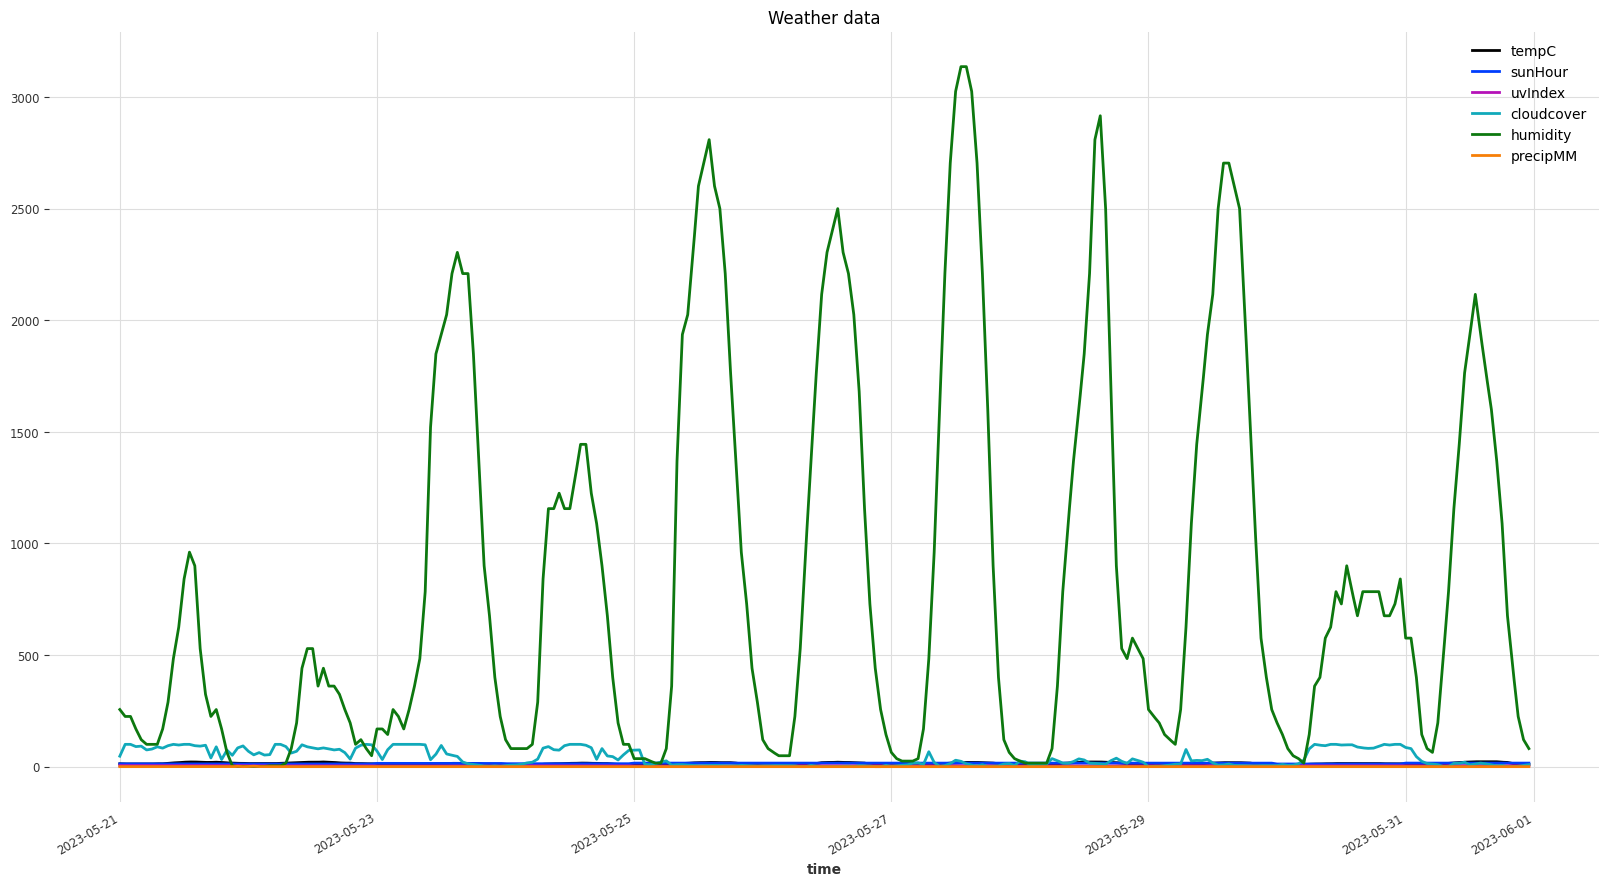

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ts_weather_df['tempC'].plot(label='tempC')
ts_weather_df['sunHour'].plot(label='sunHour')
ts_weather_df['uvIndex'].plot(label='uvIndex')
ts_weather_df['cloudcover'].plot(label='cloudcover')
ts_weather_df['humidity'].plot(label='humidity')
ts_weather_df['precipMM'].plot(label='precipMM')
plt.legend()
plt.title('Weather data')

In [5]:
ts_weather_df

<TimeSeries (DataArray) (time: 1053, component: 19, sample: 1)>
array([[[21.  ],
        [12.  ],
        [ 0.1 ],
        ...,
        [10.  ],
        [36.  ],
        [15.  ]],

       [[21.  ],
        [12.  ],
        [ 0.1 ],
        ...,
        [10.  ],
        [34.75],
        [15.  ]],

       [[21.  ],
        [12.  ],
        [ 0.1 ],
        ...,
...
        ...,
        [10.  ],
        [20.  ],
        [13.5 ]],

       [[22.  ],
        [ 9.  ],
        [ 0.1 ],
        ...,
        [10.  ],
        [21.  ],
        [13.25]],

       [[22.  ],
        [ 9.  ],
        [ 0.1 ],
        ...,
        [10.  ],
        [22.  ],
        [13.  ]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-05-21 ... 2023-05-31T23:00:00
  * component  (component) object 'maxtempC' 'mintempC' ... 'windspeedKmph'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [6]:
df_solar = pd.read_csv('solar_data.csv')
data_solar = df_solar.rename(columns={'date': 'time', 'value': 'SolarPower[Wh]'})
data_solar.index = pd.to_datetime(data_solar['time'])
data_solar_interp = data_solar.interpolate(method='time')
df_solar_resamp = data_solar_interp.resample('900S').mean()
# Drop NaN values by interpolating
df_solar_resamp = df_solar_resamp.interpolate(method='time')
df_solar_resamp = df_solar_resamp.resample('900S').mean()
# Drop NaN values
df_solar_resamp = df_solar_resamp.dropna()
df_solar_resamp = df_solar_resamp.drop(columns=['Unnamed: 0'], axis=1)
df_solar_resamp = df_solar_resamp.clip(lower=0.1)
ts_solar_df = TimeSeries.from_dataframe(df_solar_resamp, freq='900S')

from darts.utils.missing_values import fill_missing_values
ts_solar_df = fill_missing_values(ts_solar_df, 1.0)
ts_solar_df

C:\Users\TomK2\AppData\Local\Temp\ipykernel_11136\2608082919.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_solar_resamp = data_solar_interp.resample('900S').mean()


<TimeSeries (DataArray) (time: 464, component: 1, sample: 1)>
array([[[1.092e+03]],

       [[6.140e+02]],

       [[3.870e+02]],

       [[5.090e+02]],

       [[5.190e+02]],

       [[1.116e+03]],

       [[3.670e+02]],

       [[7.490e+02]],

       [[8.750e+02]],

       [[6.240e+02]],

...

       [[6.630e+02]],

       [[5.670e+02]],

       [[5.750e+02]],

       [[3.320e+02]],

       [[3.520e+02]],

       [[4.330e+02]],

       [[4.310e+02]],

       [[1.840e+02]],

       [[7.100e+01]],

       [[6.200e+01]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-04-30T16:30:00 ... 2023-05-05T12:15:00
  * component  (component) object 'SolarPower[Wh]'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [7]:
# get latest time
latest_time = ts_solar_df.end_time()
latest_time

Timestamp('2023-05-05 12:15:00', freq='900S')

In [8]:
# add 5 minutes to latest time
from datetime import timedelta
latest_time = latest_time + timedelta(minutes=5)

# stop ts_weather_df on latest time
ts_weather_df, delete = ts_weather_df.split_after(latest_time)
ts_weather_df

ValueError: Timestamp must be between 2023-05-21 00:00:00 and 2023-05-31 23:00:00


ValueError: Timestamp must be between 2023-05-21 00:00:00 and 2023-05-31 23:00:00

Text(0.5, 1.0, 'Weather data')

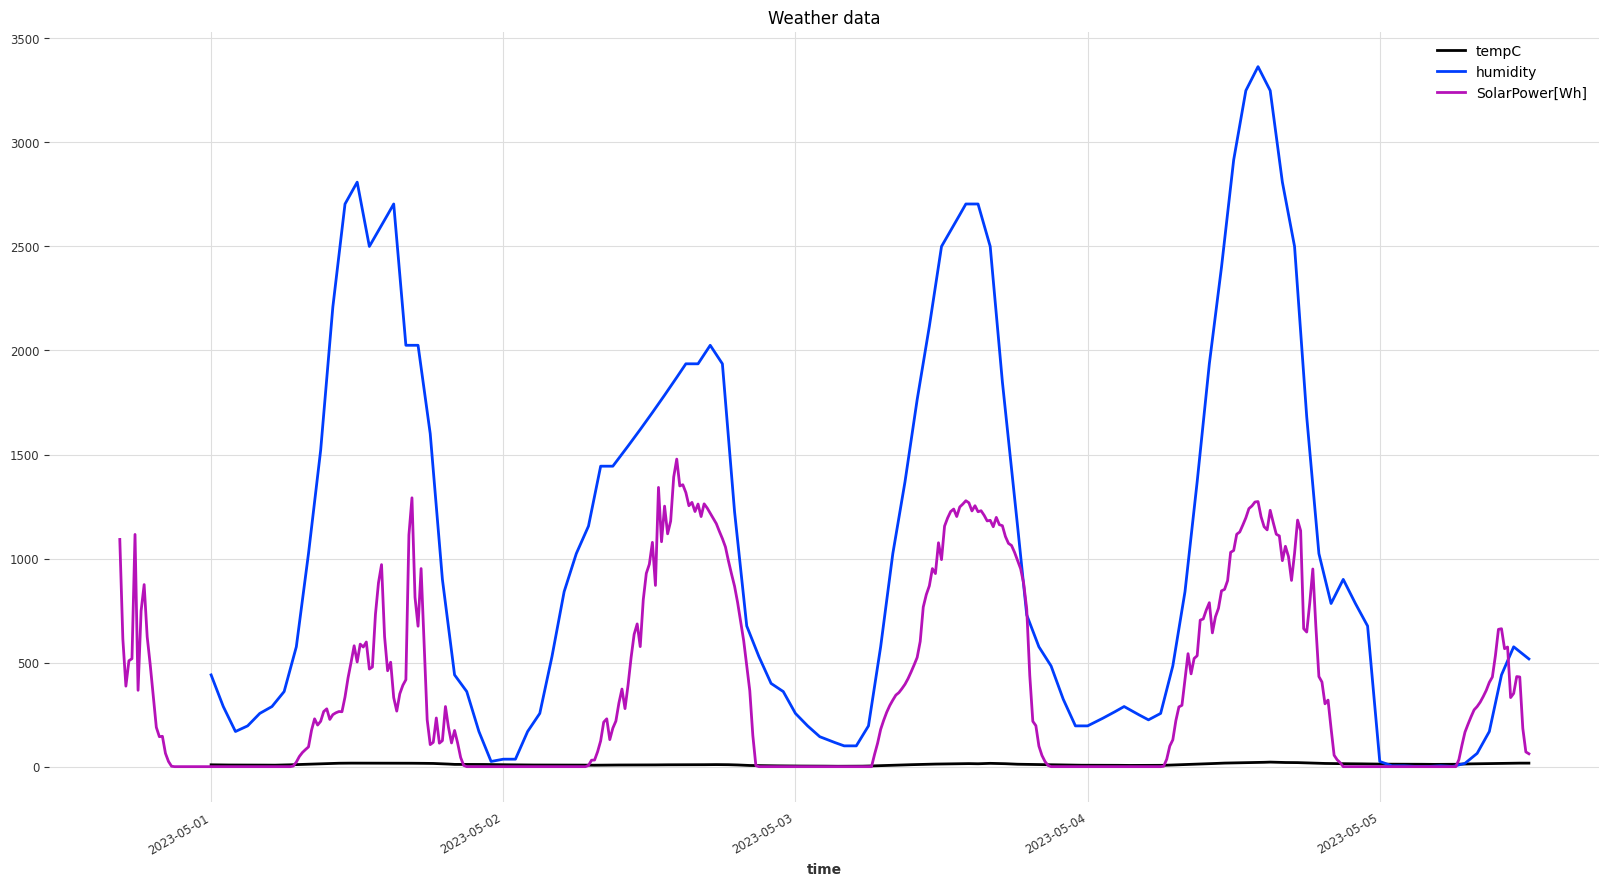

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ts_weather_df['tempC'].plot(label='tempC')
# ts_weather_df['sunHour'].plot(label='sunHour')
# ts_weather_df['uvIndex'].plot(label='uvIndex')
# ts_weather_df['cloudcover'].plot(label='cloudcover')
ts_weather_df['humidity'].plot(label='humidity')
# ts_weather_df['precipMM'].plot(label='precipMM')
ts_solar_df['SolarPower[Wh]'].plot(label='SolarPower[Wh]')
plt.legend()
plt.title('Weather data')

In [ ]:
weather_data = pd.read_csv('amersfoort.csv')

In [ ]:
sunrise_times = weather_data['sunrise'].unique()
sunset_times = weather_data['sunset'].unique()
# make column with dates of date_time column
weather_data['dates'] = weather_data['date_time'].str[:10]

dates = weather_data['dates'].unique()

In [197]:
from datetime import timedelta
# rename columns
weather_data = weather_data.rename(columns={'date_time': 'time'})
# inverse humidity data
weather_data['humidity'] = 100 - weather_data['humidity']
# square humiduty data
# weather_data['humidity'] = weather_data['humidity']**2

from datetime import datetime

# convert weather_data['date_time'] to datetime
weather_data['datetime'] = pd.to_datetime(weather_data['time'])

# make a column with 0's
weather_data['forecasted_solar_power'] = 0

# loop over sunrise times and sunset times and if night, set humidity to 0
for i in range(len(sunrise_times)):
    sunrise = sunrise_times[i]
    sunset = sunset_times[i]
    # create datetime of sunrise and sunset
    date = dates[i]

    # times
    sunrise = datetime.strptime(sunrise, '%I:%M %p')
    sunset = datetime.strptime(sunset, '%I:%M %p')

    # add two hours to times
    sunrise = sunrise + timedelta(hours=2)
    sunset = sunset - timedelta(hours=1)

    # add date to times
    sunrise = datetime.combine(datetime.strptime(date, '%Y-%m-%d').date(), sunrise.time())
    sunset = datetime.combine(datetime.strptime(date, '%Y-%m-%d').date(), sunset.time())
    print(sunrise, sunset)

    weather_data.loc[(weather_data['datetime'] <= sunrise) & (weather_data['datetime'] >= sunset), 'forecasted_solar_power'] = 0
    weather_data.loc[(weather_data['datetime'] >= sunrise) & (weather_data['datetime'] <= sunset), 'forecasted_solar_power'] = 1

# multiply humidity with forecasted_solar_power
weather_data['forecasted_solar_power'] = weather_data['humidity'] * weather_data['forecasted_solar_power'] * weather_data['uvIndex'] * weather_data['tempC']

2023-05-01 08:09:00 2023-05-01 20:03:00
2023-05-02 08:07:00 2023-05-02 20:05:00
2023-05-03 08:05:00 2023-05-03 20:07:00
2023-05-04 08:03:00 2023-05-04 20:08:00
2023-05-05 08:01:00 2023-05-05 20:10:00
2023-05-06 08:00:00 2023-05-06 20:12:00
2023-05-07 07:58:00 2023-05-07 20:14:00
2023-05-08 07:56:00 2023-05-08 20:15:00


In [198]:
df_weath_pred = weather_data.drop(columns=['sunrise', 'sunset', 'dates', 'datetime'], axis=1)
# interpolate data
df_weath_pred.index = pd.to_datetime(df_weath_pred['time'])
df_weath_pred = df_weath_pred.interpolate(method='time')
df_weath_pred = df_weath_pred.resample('900S').mean()
# Drop NaN values by interpolating
df_weath_pred = df_weath_pred.interpolate(method='time')
df_weath_pred = df_weath_pred.resample('900S').mean()
# Drop NaN values
df_weath_pred = df_weath_pred.dropna()
df_weath_pred = df_weath_pred.clip(lower=0.1)
ts_weather_df = TimeSeries.from_dataframe(df_weath_pred, freq='900S')

from darts.utils.missing_values import fill_missing_values
ts_weather_df = fill_missing_values(ts_weather_df, 1.0)
ts_uvIndex_pred = ts_weather_df['tempC']

C:\Users\TomK2\AppData\Local\Temp\ipykernel_23168\3538783107.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weath_pred = df_weath_pred.resample('900S').mean()


In [199]:
# stop ts_weather_df on latest time
ts_weather_df, delete = ts_weather_df.split_after(latest_time)
ts_weather_df

<TimeSeries (DataArray) (time: 434, component: 20, sample: 1)>
array([[[1.70000e+01],
        [7.00000e+00],
        [1.00000e-01],
        ...,
        [1.12000e+02],
        [8.00000e+00],
        [1.00000e-01]],

       [[1.70000e+01],
        [7.00000e+00],
        [1.00000e-01],
        ...,
        [1.12500e+02],
        [8.00000e+00],
        [1.00000e-01]],

       [[1.70000e+01],
        [7.00000e+00],
        [1.00000e-01],
        ...,
...
        ...,
        [2.33750e+02],
        [2.05000e+01],
        [1.18575e+03]],

       [[1.70000e+01],
        [1.10000e+01],
        [1.00000e-01],
        ...,
        [2.36000e+02],
        [2.10000e+01],
        [1.17300e+03]],

       [[1.70000e+01],
        [1.10000e+01],
        [1.00000e-01],
        ...,
        [2.37000e+02],
        [2.05000e+01],
        [1.16025e+03]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-05-01 ... 2023-05-05T12:15:00
  * component  (component) object 'maxtempC' ... 'forecasted_solar_power'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Text(0.5, 1.0, 'Weather data')

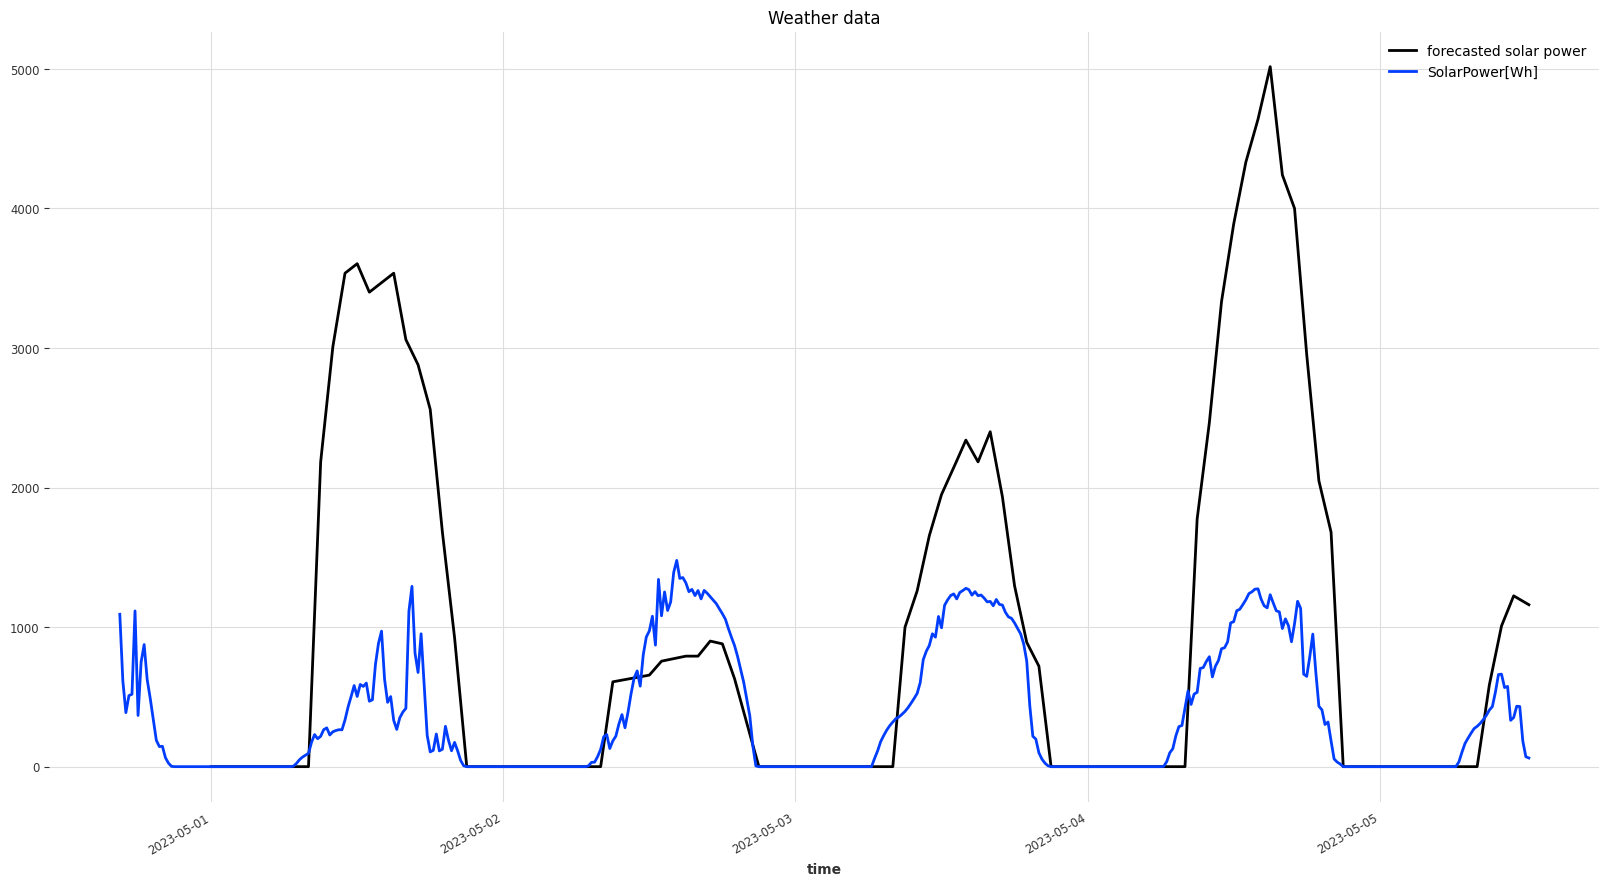

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# ts_weather_df['tempC'].plot(label='tempC')
# ts_weather_df['sunHour'].plot(label='sunHour')
# ts_weather_df['uvIndex'].plot(label='uvIndex')
# ts_weather_df['cloudcover'].plot(label='cloudcover')
ts_weather_df['forecasted_solar_power'].plot(label='forecasted solar power')
# ts_weather_df['precipMM'].plot(label='precipMM')
ts_solar_df['SolarPower[Wh]'].plot(label='SolarPower[Wh]')
plt.legend()
plt.title('Weather data')